In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\#Projects\Climate Data Analysis\all_years.csv')

In [3]:
df

,Unnamed: 0,date,T,TM,Tm,SLP,H,PP,VV,V,VM,Month,years
0,0,1,19.30,26.0,13.0,1016.20,55.0,0.0,8.50,8.10,10.70,1,1973
1,1,2,16.00,23.0,10.0,1015.70,60.0,0.0,8.90,7.20,9.10,1,1973
2,2,3,20.50,28.0,14.0,1014.90,49.0,0.0,10.00,5.40,7.20,1,1973
3,3,5,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973
4,4,8,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,9631,21,17.10,25.0,8.0,1016.20,41.0,0.0,3.90,3.90,7.60,12,2021
9632,9632,25,18.50,24.4,12.0,1014.20,63.0,0.0,4.20,6.10,11.10,12,2021
9633,9633,26,18.90,25.4,12.0,1015.70,61.0,0.0,4.00,6.30,11.10,12,2021
9634,9634,27,20.10,26.0,13.4,1015.20,58.0,0.0,4.00,4.60,13.00,12,2021


# Preprocessing

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

## Setting date as index

In [5]:
datetime_object_list = []

for i in range(len(df.index)):
    date_str = str(df.iloc[i,0]) + '/'+str(df.iloc[i,10]) +'/'+ str(df.iloc[i,11])[2:]
    datetime_object = datetime.strptime(date_str, '%d/%m/%y')
    datetime_object_list.append(datetime_object)
    
    
df['date'] = datetime_object_list   
df = df.set_index(['date'])
df

,T,TM,Tm,SLP,H,PP,VV,V,VM,Month,years
date,,,,,,,,,,,
1973-01-01,19.30,26.0,13.0,1016.20,55.0,0.0,8.50,8.10,10.70,1,1973
1973-01-02,16.00,23.0,10.0,1015.70,60.0,0.0,8.90,7.20,9.10,1,1973
1973-01-03,20.50,28.0,14.0,1014.90,49.0,0.0,10.00,5.40,7.20,1,1973
1973-01-05,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973
1973-01-08,18.27,26.4,10.7,1014.85,51.3,0.0,8.33,8.88,21.14,1,1973
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,17.10,25.0,8.0,1016.20,41.0,0.0,3.90,3.90,7.60,12,2021
2021-12-25,18.50,24.4,12.0,1014.20,63.0,0.0,4.20,6.10,11.10,12,2021
2021-12-26,18.90,25.4,12.0,1015.70,61.0,0.0,4.00,6.30,11.10,12,2021


In [6]:
max_per_year = df.resample('y').max()
mean_per_year = df.resample('y').mean()

T


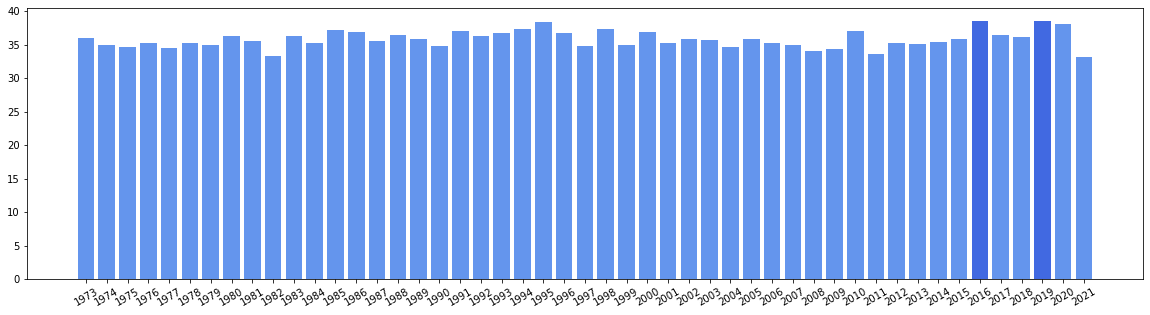

TM


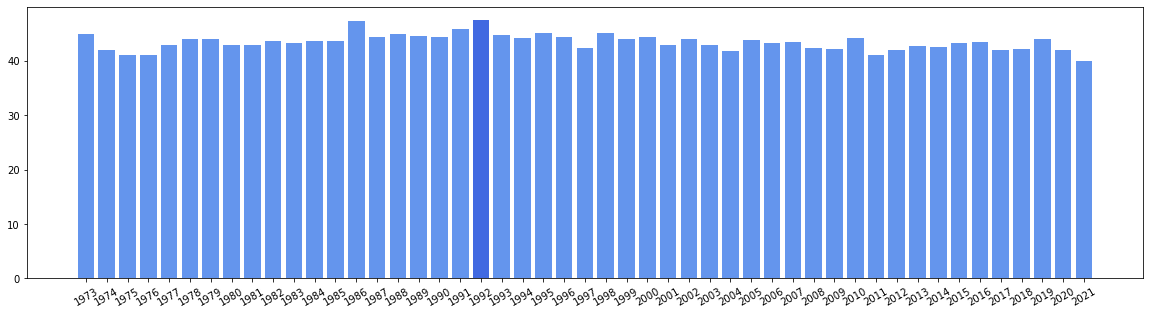

Tm


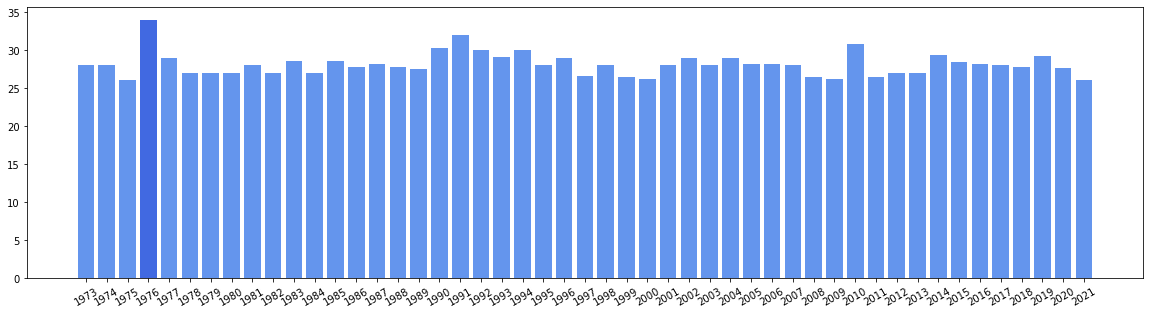

In [7]:
for i in ['T','TM','Tm']:
    
    fig, ax = plt.subplots(figsize =(20, 5))
    mask1 = max_per_year[i] == max_per_year[i].max()
    
    plt.bar(max_per_year['years'],max_per_year[i],color="cornflowerblue")
    plt.bar(max_per_year['years'][mask1],max_per_year[i][mask1],color = 'royalblue')

    plt.xticks(list(max_per_year['years']),rotation=30)
    print(i)
    plt.show()
    
    # plt.grid(axis='y')

    # plt.tight_layout()
    # print("Highest Temperature:",mean_per_year['TM'].max(),"degree celcius")

# Q. In which year temperature was highest?

Highest Temperature: 47.6 degree celcius


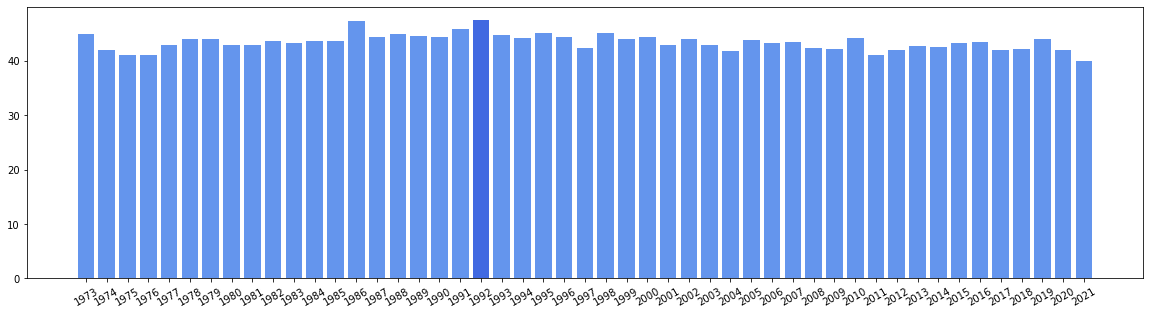

In [8]:
fig, ax = plt.subplots(figsize =(20, 5))
mask1 = max_per_year['TM'] == max_per_year['TM'].max()

plt.bar(max_per_year['years'],max_per_year['TM'],color="cornflowerblue")
plt.bar(max_per_year['years'][mask1],max_per_year['TM'][mask1],color = 'royalblue')

plt.xticks(list(max_per_year['years']),rotation=30)
# plt.grid(axis='y')

# plt.tight_layout()
print("Highest Temperature:",max_per_year['TM'].max(),"degree celcius")

# In which month did the highest ever rainfall took place 

In [9]:
grp_by_year = df.groupby("years")
max_val_in_month_for_an_year = grp_by_year.get_group(1973).resample('M').max()
max_val_in_month_for_an_year

,T,TM,Tm,SLP,H,PP,VV,V,VM,Month,years
date,,,,,,,,,,,
1973-01-31,22.0,31.0,14.0,1017.1,66.0,0.00,10.0,20.2,83.2,1,1973
1973-02-28,24.8,35.0,19.0,1018.5,57.0,0.00,10.0,17.8,21.9,2,1973
1973-03-31,31.3,40.0,26.0,1014.5,42.0,0.00,12.6,25.7,33.2,3,1973
1973-04-30,34.0,43.0,25.0,1007.3,28.0,0.00,10.0,19.4,24.1,4,1973
1973-05-31,36.0,45.0,28.0,1007.0,50.0,0.00,15.0,27.6,33.2,5,1973
1973-06-30,34.8,42.0,28.0,1003.7,89.0,4.06,20.0,36.5,46.5,6,1973
1973-07-31,26.5,33.0,24.0,1004.0,99.0,48.01,10.0,30.0,68.3,7,1973
1973-08-31,28.6,35.0,23.0,1004.2,96.0,49.02,10.8,27.2,29.4,8,1973
1973-09-30,25.6,32.0,22.0,1007.8,95.0,53.09,10.0,31.1,40.7,9,1973


In [10]:
max_value_df = pd.DataFrame()

In [11]:
yr = list(range(1973,2022,1))

In [12]:
max_val_in_month = pd.DataFrame()
for i in yr:
    max_val_in_month_for_an_year = grp_by_year.get_group(i).resample('M').max()
    max_val_in_month = pd.concat([max_val_in_month,max_val_in_month_for_an_year])

In [13]:
max_val_in_month

,T,TM,Tm,SLP,H,PP,VV,V,VM,Month,years
date,,,,,,,,,,,
1973-01-31,22.0,31.0,14.0,1017.1,66.0,0.00,10.0,20.2,83.2,1,1973
1973-02-28,24.8,35.0,19.0,1018.5,57.0,0.00,10.0,17.8,21.9,2,1973
1973-03-31,31.3,40.0,26.0,1014.5,42.0,0.00,12.6,25.7,33.2,3,1973
1973-04-30,34.0,43.0,25.0,1007.3,28.0,0.00,10.0,19.4,24.1,4,1973
1973-05-31,36.0,45.0,28.0,1007.0,50.0,0.00,15.0,27.6,33.2,5,1973
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,26.3,30.0,23.4,1005.9,95.0,49.02,4.7,24.8,33.5,8,2021
2021-09-30,28.1,32.0,23.8,1007.0,91.0,107.95,5.3,17.2,77.8,9,2021
2021-10-31,28.3,37.0,23.0,1014.2,84.0,8.89,4.5,10.2,22.2,10,2021


In [14]:
df_for_pp = max_val_in_month.reset_index().pivot(index="years", columns="Month", values="PP")
df_for_pp

Month,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
1973,0.00,0.00,0.00,0.00,0.00,4.06,48.01,49.02,53.09,1.02,0.00,0.51
1974,0.00,0.00,0.00,0.00,0.00,38.10,10.92,160.02,16.00,5.08,0.00,0.00
1975,0.00,0.00,0.00,0.00,0.00,0.00,3.05,0.00,6.10,0.00,0.00,0.00
1976,0.00,0.00,0.00,0.00,0.00,0.00,0.51,18.03,0.51,0.00,0.00,0.00
1977,20.07,7.11,0.00,0.00,0.00,400.05,42.93,39.88,160.02,0.00,1.02,3.05
1978,0.00,0.00,0.00,13.97,0.00,22.10,80.01,44.96,38.10,0.00,9.91,51.05
1979,0.00,1.02,0.00,0.00,0.00,80.01,28.96,19.05,4.06,7.11,0.51,5.08
1980,0.00,0.00,0.00,0.00,0.00,89.92,59.94,59.94,5.08,0.00,0.00,0.00
1981,4.06,0.00,0.00,0.00,1.02,6.10,38.10,70.10,19.05,11.94,50.04,0.00


<AxesSubplot:xlabel='Month', ylabel='years'>

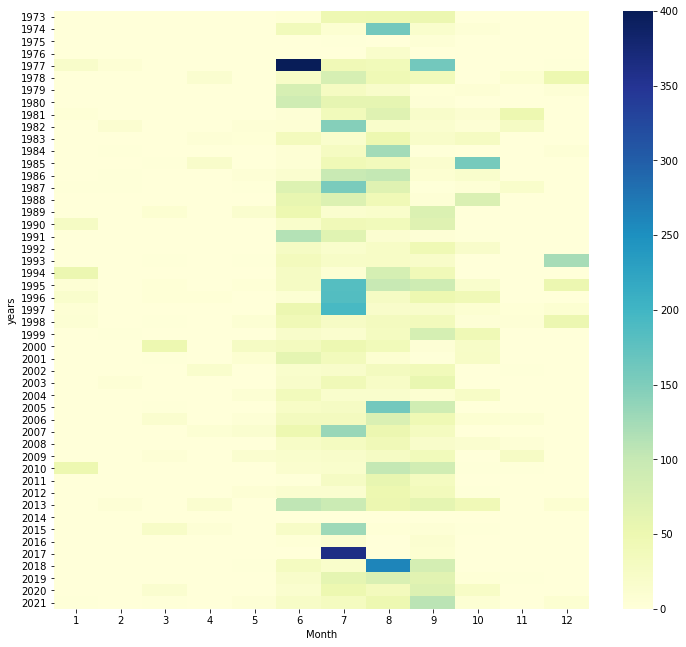

In [15]:
fig, ax = plt.subplots(figsize=(12,11))  
sns.heatmap(df_for_pp,cmap="YlGnBu")

# Heat map of all features

Heatmap for T


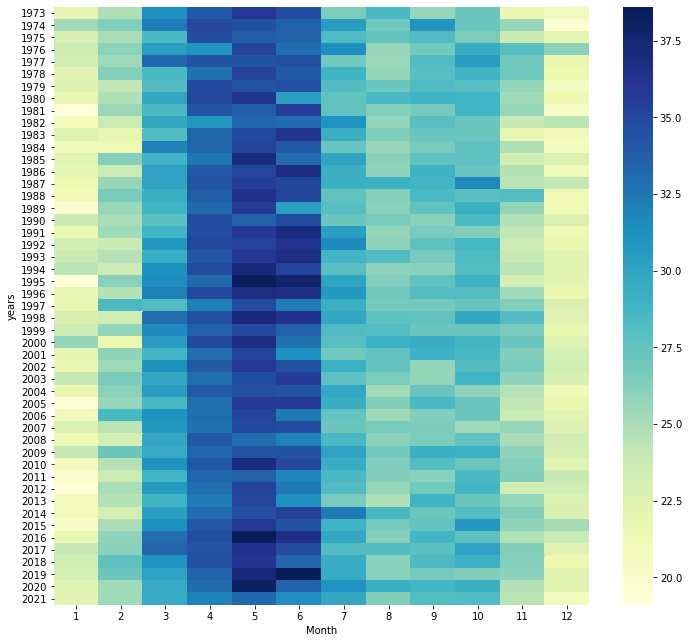

Heatmap for TM


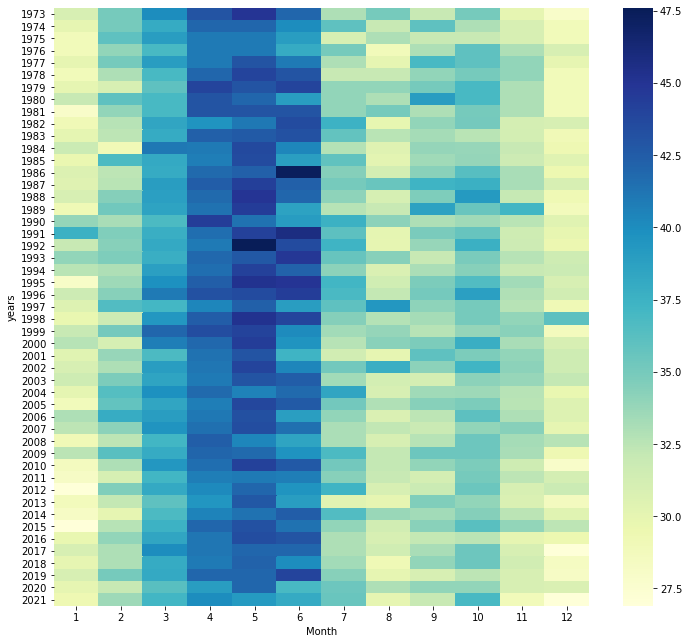

Heatmap for Tm


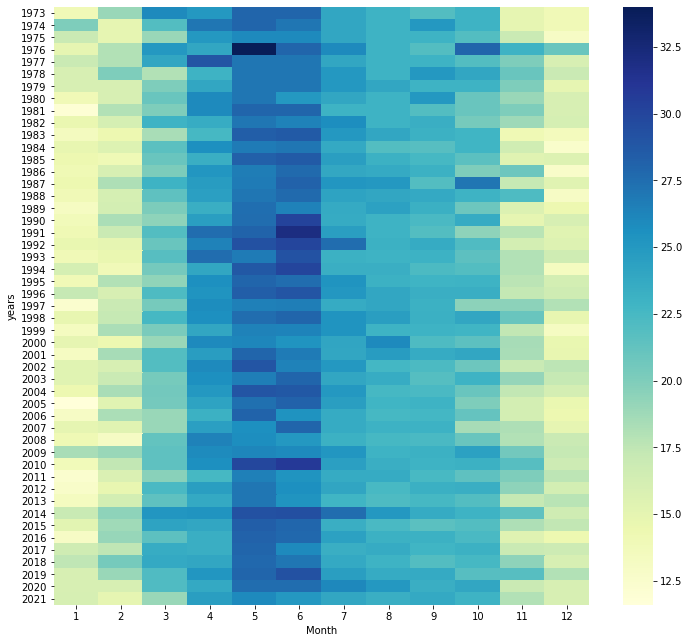

Heatmap for SLP


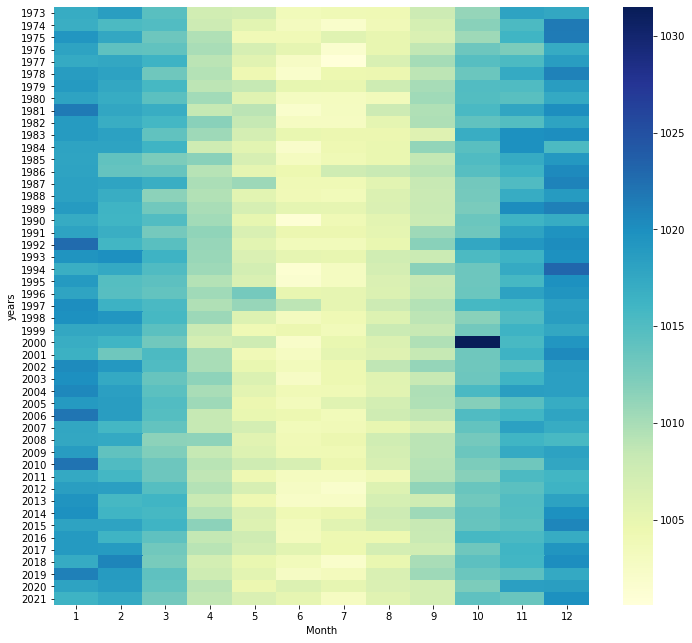

Heatmap for H


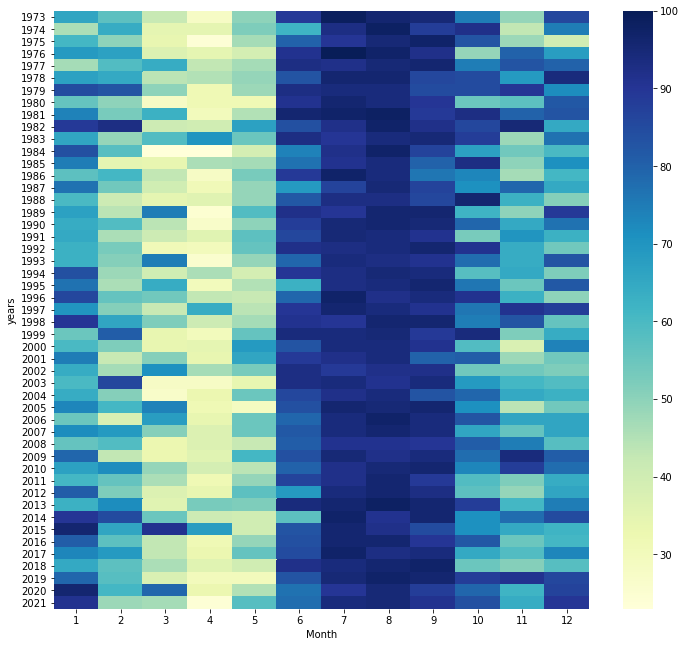

Heatmap for PP


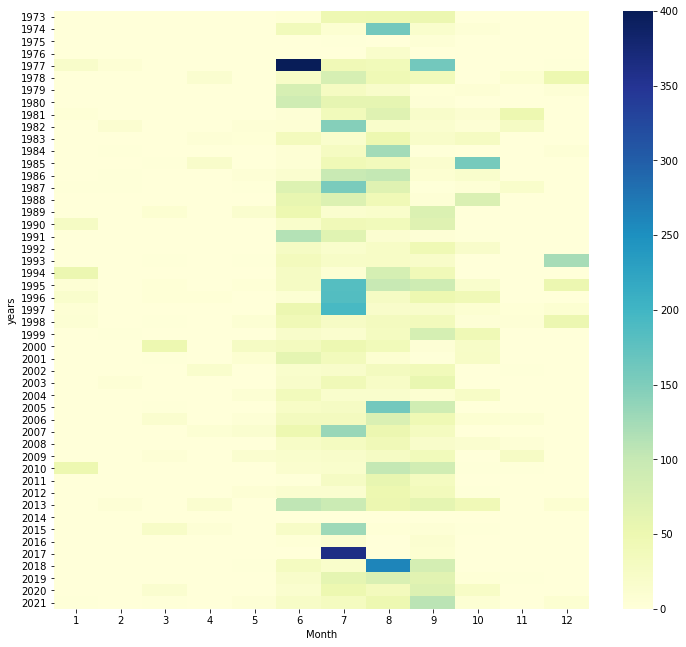

Heatmap for VV


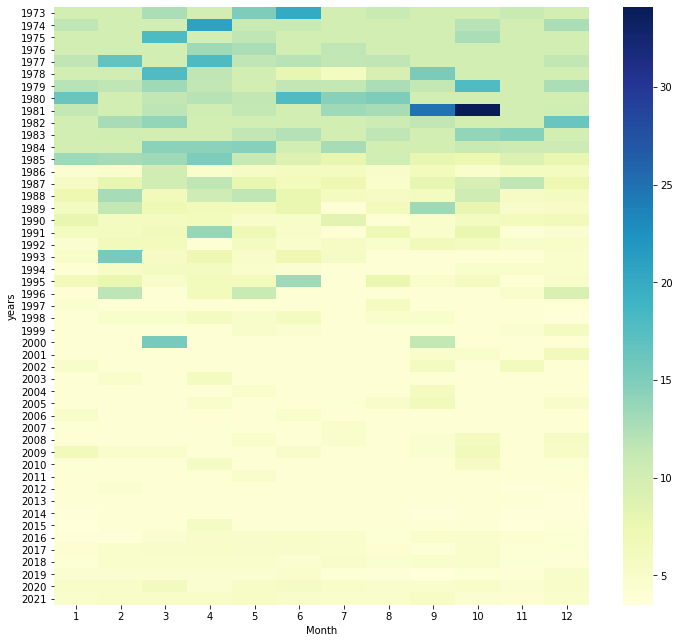

Heatmap for V


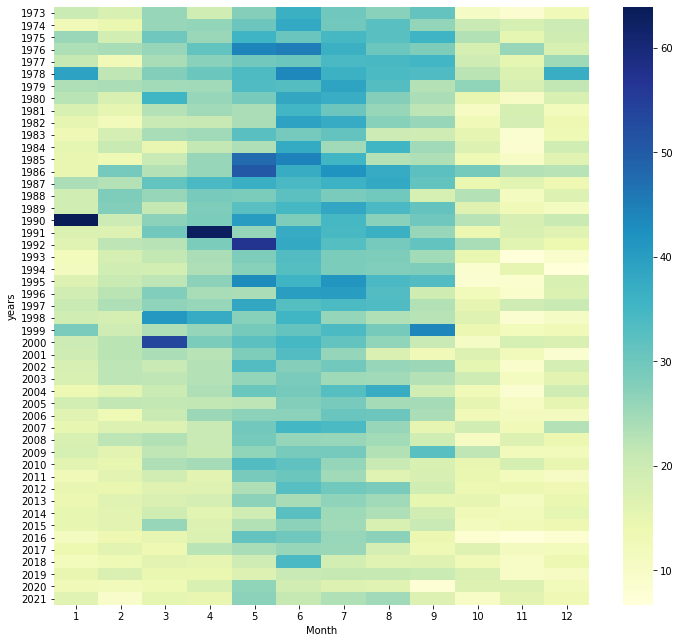

In [16]:
for i in df.columns[0:8]:
    df_for_individuals = max_val_in_month.reset_index().pivot(index="years", columns="Month", values=i)
    print("Heatmap for", i)
    fig, ax = plt.subplots(figsize=(12,11))  
    sns.heatmap(df_for_individuals,cmap="YlGnBu")

    plt.show()

# Correlation between Features

In [17]:
corr = df.corr()
corr

,T,TM,Tm,SLP,H,PP,VV,V,VM,Month,years
T,1.000000,0.900038,0.852408,-0.689952,-0.248720,-0.020802,0.052226,0.410752,0.350095,-0.081364,0.049515
TM,0.900038,1.000000,0.613163,-0.441535,-0.535405,-0.128996,0.096223,0.250772,0.246632,-0.179828,-0.015856
Tm,0.852408,0.613163,1.000000,-0.859533,0.223962,0.116379,0.005488,0.542018,0.448604,0.076296,0.029368
SLP,-0.689952,-0.441535,-0.859533,1.000000,-0.347604,-0.210158,-0.003998,-0.603614,-0.490636,-0.005590,-0.004699
H,-0.248720,-0.535405,0.223962,-0.347604,1.000000,0.287607,-0.143220,0.182226,0.121133,0.358438,0.043565
PP,-0.020802,-0.128996,0.116379,-0.210158,0.287607,1.000000,-0.069019,0.112848,0.098279,0.062199,0.009291
VV,0.052226,0.096223,0.005488,-0.003998,-0.143220,-0.069019,1.000000,0.070690,0.046850,-0.047996,-0.711566
V,0.410752,0.250772,0.542018,-0.603614,0.182226,0.112848,0.070690,1.000000,0.815942,-0.152917,-0.199887
VM,0.350095,0.246632,0.448604,-0.490636,0.121133,0.098279,0.046850,0.815942,1.000000,-0.123850,-0.216671
Month,-0.081364,-0.179828,0.076296,-0.005590,0.358438,0.062199,-0.047996,-0.152917,-0.123850,1.000000,-0.002524


<AxesSubplot:>

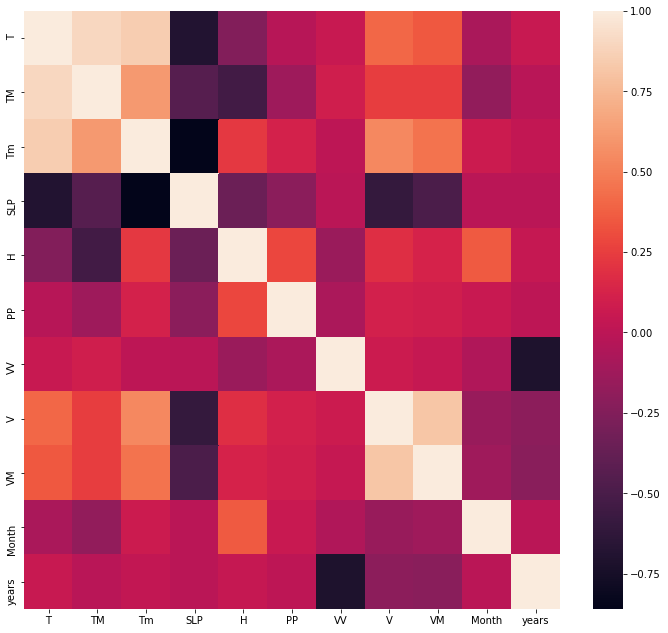

In [18]:
fig, ax = plt.subplots(figsize=(12,11))  
sns.heatmap(corr)

<AxesSubplot:xlabel='date', ylabel='T'>

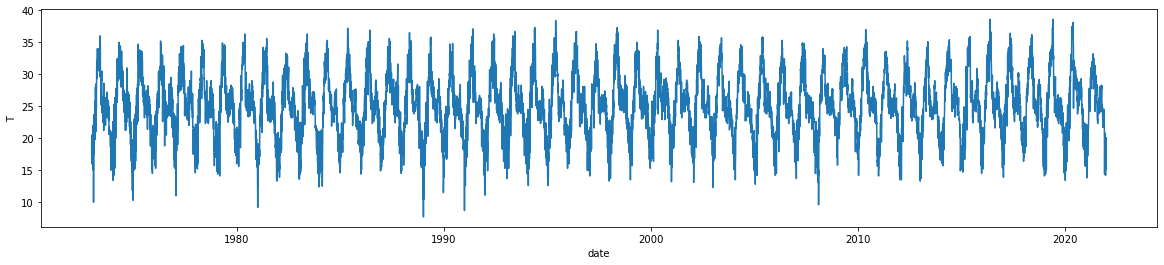

In [19]:
plt.figure(figsize=(20,4))
sns.lineplot(x="date",y="T",data = df.reset_index())